## Neural Network- Tensorflow

Up until now we have only focused on Input values and the Output results. We know that we fit in some input values and later pass it to the model and then predict the test label and obtain prediction result.

Now we will dig deep into Neural Network and this is the beginning of Deep Learning...

You can check this article to get the detail knowledge on [How Neural Networks work](to be published) and how to implement it step-by-step, in this Notebook we shall primarily focus on implementing Neural network in Tensorflow

I hope and assume that you have read the article or trying the code along with the article.

In [12]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
y_train.shape

(60000,)

In [16]:
X_test.shape

(10000, 28, 28)

This is how our data looks like

In [24]:
import pandas as pd

data = pd.DataFrame(X_train[7])
pd.set_option('display.max_columns',28)

In [25]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,38,43,105,255,253,253,253,253,253,174,6,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,43,139,224,226,252,253,252,252,252,252,252,252,158,14,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,178,252,252,252,252,253,252,252,252,252,252,252,252,59,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,109,252,252,230,132,133,132,132,189,252,252,252,252,59,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,4,29,29,24,0,0,0,0,14,226,252,252,172,7,0,0,0,0,0


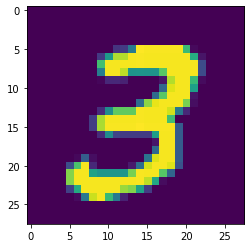

In [26]:
#Let us visualize it
plt.imshow(X_train[7])

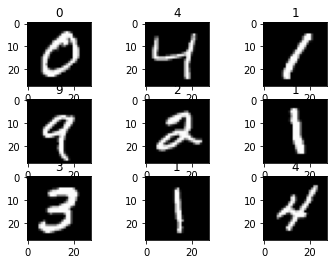

In [27]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X_train[i],cmap="gray")
    plt.title(y_train[i])

In [28]:
X_train = X_train/255.0
X_test = X_test/255.0

In [29]:
data = pd.DataFrame(X_train[7])

In [30]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149020,0.168627,0.411765,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.682353,0.023529,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.168627,0.545098,0.878431,0.886275,0.988235,0.992157,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.619608,0.054902,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.698039,0.988235,0.988235,0.988235,0.988235,0.992157,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.231373,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.427451,0.988235,0.988235,0.901961,0.517647,0.521569,0.517647,0.517647,0.741176,0.988235,0.988235,0.988235,0.988235,0.231373,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.015686,0.113725,0.113725,0.094118,0.000000,0.000000,0.000000,0.000000,0.054902,0.886275,0.988235,0.988235,0.674510,0.027451,0.0,0.0,0.0,0.0,0.0


#### Scaling the Dataset

While working with images we scale the input data by dividing the input data by /255.0. But before that we have to flatten the shape of the image i.e.,  each image will be converted to float32, normalized to [0, 1] and flattened to a 1-D array of 784 features (28*28).

In [52]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=10,activation="softmax")
])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### Verification of Summary

In [54]:
784*64+64   #parameters = x*w+b = 784*64+64

50240

In [55]:
64*10+10  #for output layer we get input from hidden layer, so 64*10+10

650

In [56]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [59]:
history = model.fit(X_train,y_train,epochs=40,batch_size=20)

Epoch 1/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0508 - accuracy: 0.9822
Epoch 2/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0475 - accuracy: 0.9837
Epoch 3/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0492 - accuracy: 0.9827
Epoch 4/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0465 - accuracy: 0.9844
Epoch 5/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0458 - accuracy: 0.9843
Epoch 6/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0457 - accuracy: 0.9840
Epoch 7/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0469 - accuracy: 0.9843
Epoch 8/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0448 - accuracy: 0.9848
Epoch 9/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0446 - accuracy: 0.9850
Epoch 10/40
3000/3000 [==============================] - 4s 1ms/step - loss: 0.045

You can add more epochs and look when the acuracy is more and loss is least, but I will stop at 40

In [61]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

313/313 - 0s - loss: 0.1432 - accuracy: 0.9748 - 367ms/epoch - 1ms/step


In [62]:
train_loss, train_acc = model.evaluate(X_train,y_train, verbose=2)

1875/1875 - 2s - loss: 0.0061 - accuracy: 0.9983 - 2s/epoch - 866us/step


Our model is very slightly overfitting

In [63]:
prediction = model.predict(X_test)

313/313 [==============================] - 0s 861us/step


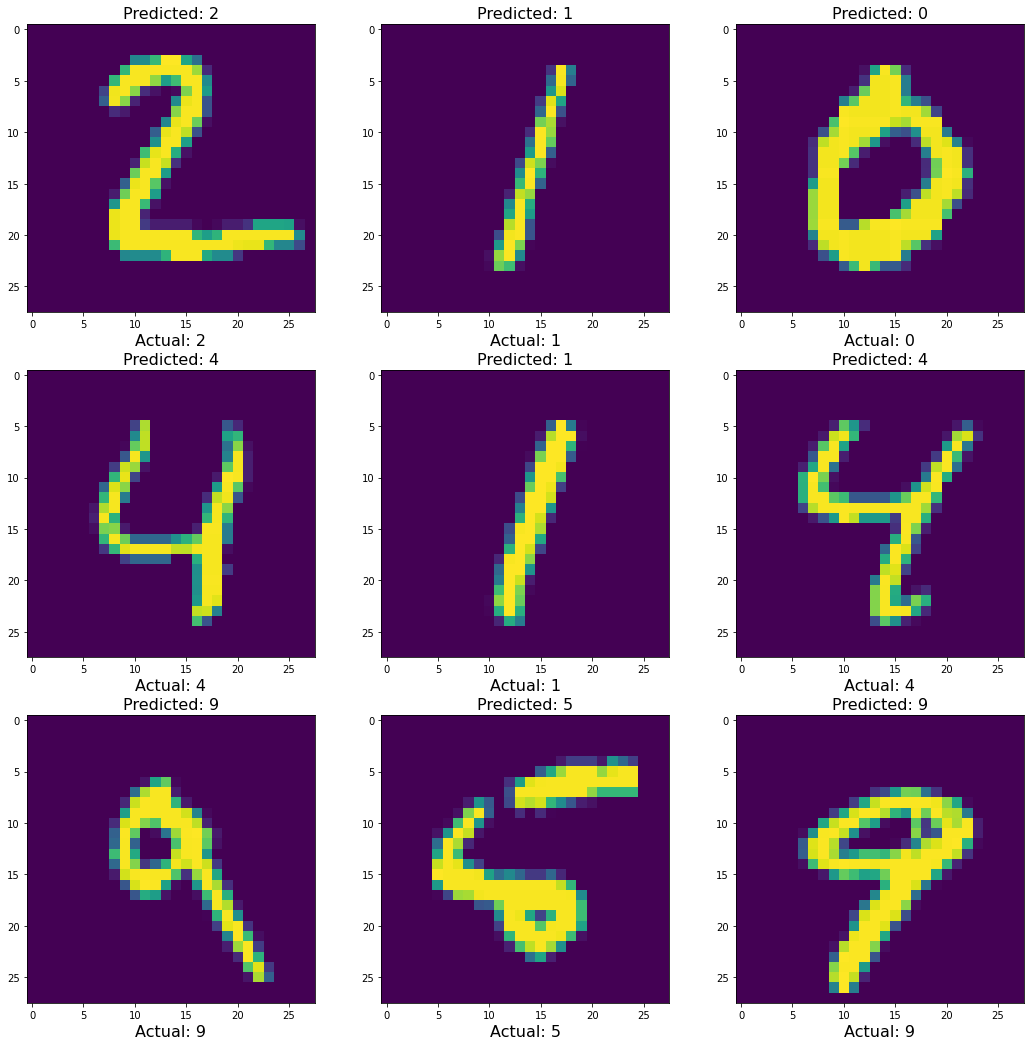

In [64]:
plt.figure(figsize=(18,18))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {np.argmax(prediction[i])}",fontsize=16)
    plt.xlabel(f"Actual: {y_test[i]}",fontsize=16)

Our model performed very well and 97% percent is excellent but we shall look into real world dataset from now on. MNIST is the hello world program in Deep Learning

### Early Stopping

Now consider you have 100 epochs running. But at one certain point the metrics and loss stops improving and it keeps returning similar result. During that time it is best practice to stop.

In [66]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit(X_train,y_train,epochs=30,batch_size =40,callbacks=[callback])

Epoch 1/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0292 - accuracy: 0.9900
Epoch 2/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0256 - accuracy: 0.9911
Epoch 3/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0294 - accuracy: 0.9903
Epoch 4/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0294 - accuracy: 0.9898


As you can see we stopped at 4th epoch only. This indicates there is no need to further proceed with running all the epochs

In [67]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

313/313 - 0s - loss: 0.1432 - accuracy: 0.9755 - 292ms/epoch - 932us/step


In [68]:
train_loss, train_acc = model.evaluate(X_train,y_train, verbose=2)

1875/1875 - 2s - loss: 0.0035 - accuracy: 0.9993 - 2s/epoch - 878us/step


In [73]:
train_loss

0.0034828579518944025

In [74]:
test_loss

0.14315485954284668

In [71]:
epochs = history.epoch
history_df = pd.DataFrame(history.history)

accuracy = history_df['accuracy']
loss = history_df['loss']

In [72]:
history_df.head(3)

,loss,accuracy
0,0.029175,0.990017
1,0.025605,0.991067
2,0.029374,0.990283


In [81]:
from sklearn.metrics import confusion_matrix

In [77]:
prediction.shape

(10000, 10)

In [78]:
y_test.shape

(10000,)

In [86]:
cm = confusion_matrix(y_test, np.argmax(prediction,axis=1))

In [87]:
cm

array([[ 970,    1,    2,    2,    0,    1,    3,    0,    1,    0],
       [   0, 1125,    3,    2,    0,    1,    2,    0,    2,    0],
       [   2,    1, 1003,    7,    1,    0,    1,    9,    8,    0],
       [   0,    0,    5,  989,    0,    7,    0,    5,    2,    2],
       [   1,    0,    6,    0,  953,    0,    7,    6,    2,    7],
       [   2,    0,    2,   14,    1,  857,    8,    1,    2,    5],
       [   4,    3,    1,    1,    2,    7,  938,    0,    2,    0],
       [   0,    4,   12,    3,    0,    0,    0, 1003,    2,    4],
       [   2,    1,    2,    9,    4,    5,    1,    8,  937,    5],
       [   3,    3,    0,    9,    9,    3,    0,    6,    3,  973]])

Text(0.5, 1.0, 'Confusion metrics')

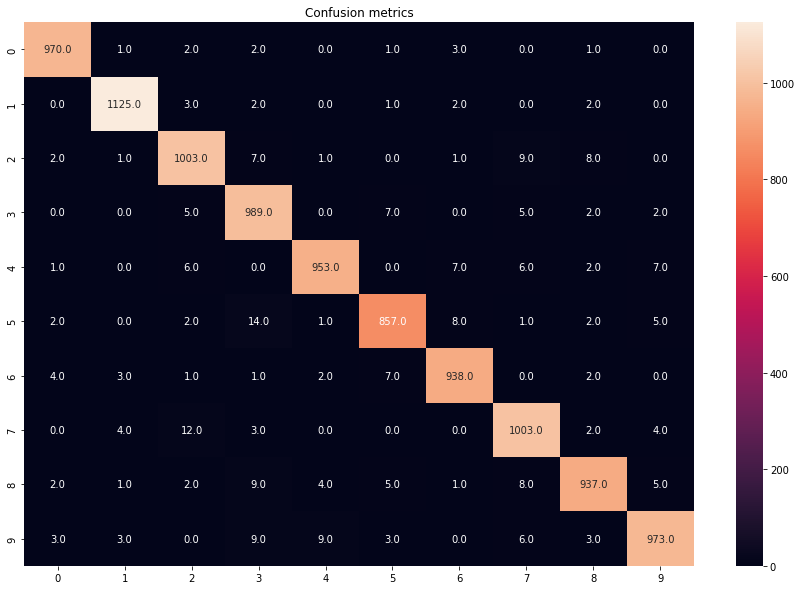

In [92]:
import seaborn

plt.figure(figsize=(15,10))
seaborn.heatmap(cm,annot=True,fmt='.1f')
plt.title("Confusion metrics")